In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras

from imgaug import augmenters as iaa
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import cv2
import pandas as pd
import ntpath
import random
import os

In [6]:
#display first 5 rows of data from csv
datadir = 'IMG'
columns= ('center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed')
data = pd.read_csv(('driving_log.csv'), names=columns)
pd.set_option('display.max_colwidth', None)

In [7]:
#clear path from jpg files

def path_leaf(path):
    head, tail=ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2022_10_12_13_21_10_965.jpg,left_2022_10_12_13_21_10_965.jpg,right_2022_10_12_13_21_10_965.jpg,0.0,0.0,0.0,0.000078
1,center_2022_10_12_13_21_11_066.jpg,left_2022_10_12_13_21_11_066.jpg,right_2022_10_12_13_21_11_066.jpg,0.0,0.0,0.0,0.000078
2,center_2022_10_12_13_21_11_167.jpg,left_2022_10_12_13_21_11_167.jpg,right_2022_10_12_13_21_11_167.jpg,0.0,0.0,0.0,0.000078
3,center_2022_10_12_13_21_11_270.jpg,left_2022_10_12_13_21_11_270.jpg,right_2022_10_12_13_21_11_270.jpg,0.0,0.0,0.0,0.000079
4,center_2022_10_12_13_21_11_371.jpg,left_2022_10_12_13_21_11_371.jpg,right_2022_10_12_13_21_11_371.jpg,0.0,0.0,0.0,0.000079


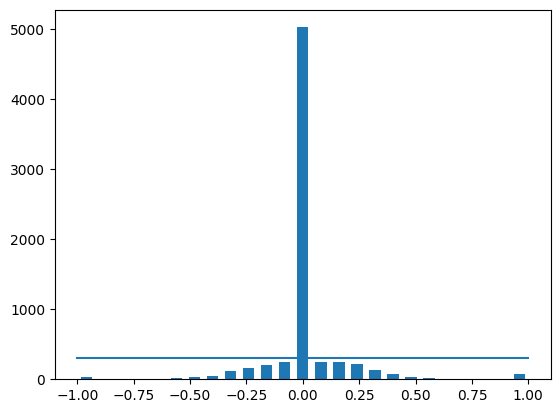

In [8]:
#draw histogram to show distribution of steering angles and select sample size per bin

num_bins = 25
samples_per_bin = 300
hist, bins =np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data: 6945
removed: 4729
remaining 2216


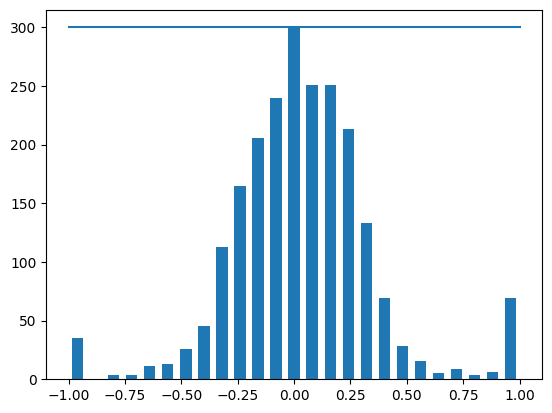

In [9]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)

    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [10]:

def load_img_steering(datadir,df):
    image_path=[]
    steering=[]
    for i in range(len(data)):
        indexed_data=data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(center.strip())
        steering.append(float(indexed_data[3]))
    image_paths=np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

image_paths, steerings=load_img_steering('/IMG', data)
print(image_paths)


['center_2022_10_12_13_21_11_876.jpg' 'center_2022_10_12_13_21_12_688.jpg'
 'center_2022_10_12_13_21_12_789.jpg' ...
 'center_2022_10_12_13_32_54_831.jpg' 'center_2022_10_12_13_32_55_033.jpg'
 'center_2022_10_12_13_32_55_136.jpg']


In [11]:
X_train,X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('training samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

training samples: 1772
Valid Samples: 444


Text(0.5, 1.0, 'training set')

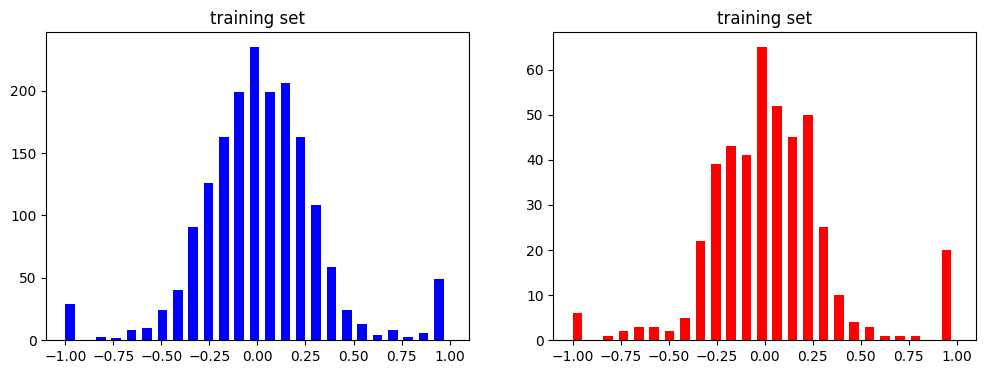

In [22]:
from turtle import width

fig, axes = plt.subplots(1, 2, figsize = (12,4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('training set')


In [23]:
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image
    

Text(0.5, 1.0, 'zoomed_image')

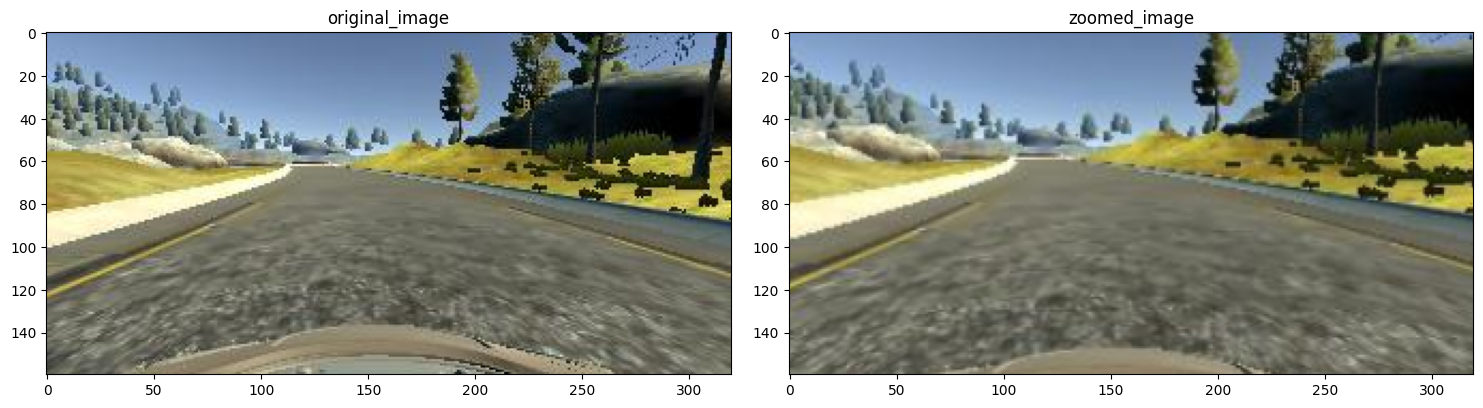

In [31]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(os.path.join(r'C:\Users\Zharb\Documents\GitHub\Self-driving-car\IMG' ,image))
zoomed_image=zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('original_image')

axs[1].imshow(zoomed_image)
axs[1].set_title('zoomed_image')

In [29]:
def pan(image):
    pan = iaa.Affine(translate_percent={"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

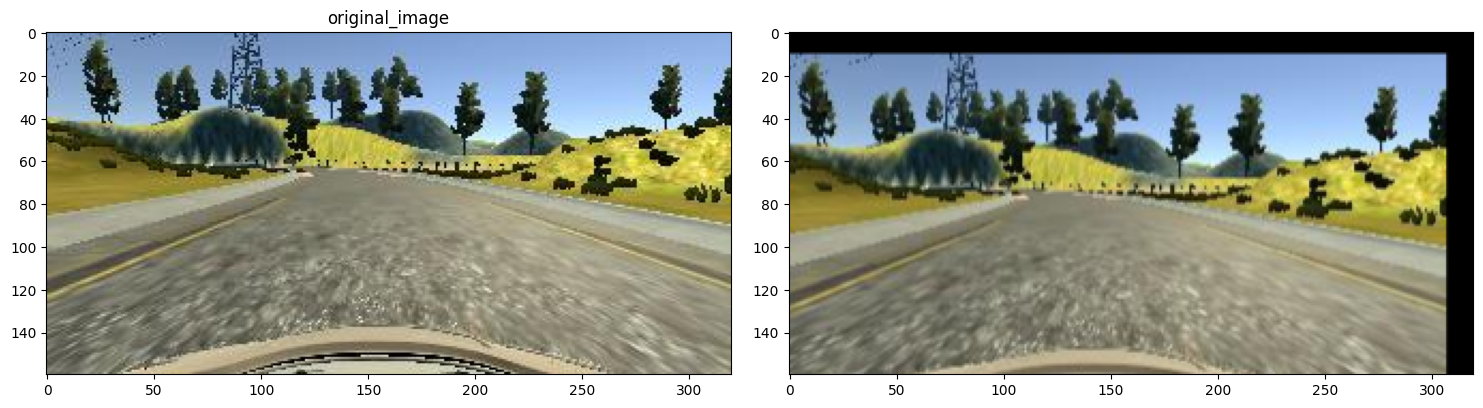

In [30]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(os.path.join(r'C:\Users\Zharb\Documents\GitHub\Self-driving-car\IMG' ,image))
panned_image=pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('original_image')

axs[1].imshow(panned_image)
axs[1].set_title('panned_image')

In [13]:
def img_preprocess(img):
    img = mpimg.imread(os.path.join(r'C:\Users\Zharb\Documents\GitHub\Self-driving-car\IMG' ,img))
    img = img[60:135, :,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1.0, 'Preprocessed image')

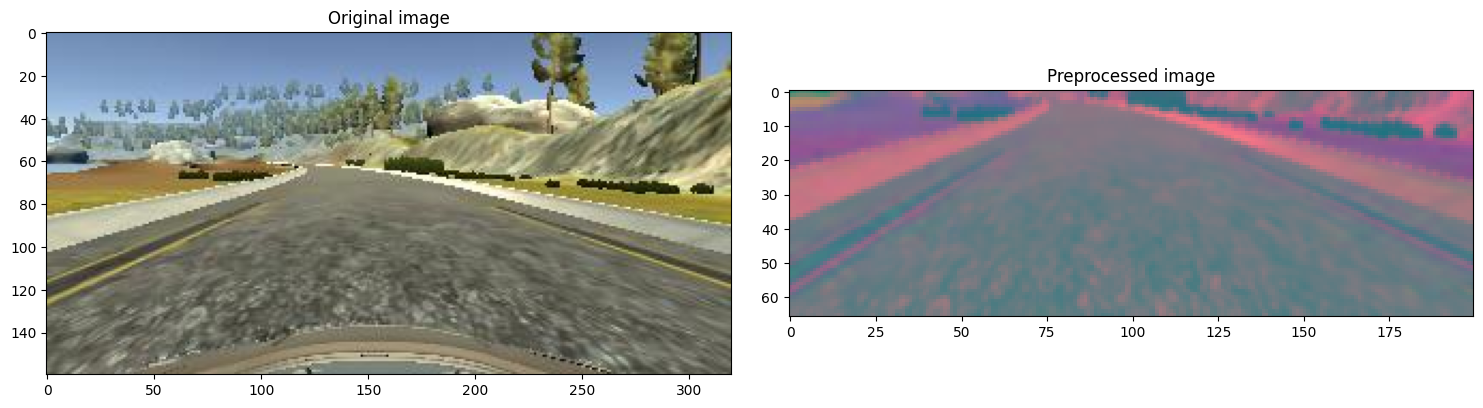

In [14]:
image = image_paths[50]
original_image = mpimg.imread(os.path.join(r'C:\Users\Zharb\Documents\GitHub\Self-driving-car\IMG' ,image))
preprocessed_image=img_preprocess(image)
fig, axs = plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed image')

In [15]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

(1772, 66, 200, 3)


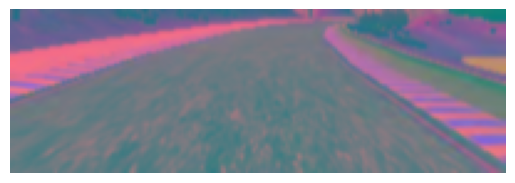

In [16]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [17]:
def nvidia_model():
    model = Sequential()
 
    model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='elu'))
 
    model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
    model.add(Dropout(0.5))
 
 
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.5))
 
 
    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation ='elu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1))
 
 
    optimizer= Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
 
    return model

In [18]:
model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

c:\Users\Zharb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Epoch 1/30
18/18 [==============================] - 4s 206ms/step - loss: 0.8953 - val_loss: 0.1061
Epoch 2/30
18/18 [==============================] - 4s 200ms/step - loss: 0.1631 - val_loss: 0.1087
Epoch 3/30
18/18 [==============================] - 4s 220ms/step - loss: 0.1269 - val_loss: 0.1011
Epoch 4/30
18/18 [==============================] - 4s 213ms/step - loss: 0.1162 - val_loss: 0.0939
Epoch 5/30
18/18 [==============================] - 4s 218ms/step - loss: 0.1124 - val_loss: 0.0907
Epoch 6/30
18/18 [==============================] - 4s 213ms/step - loss: 0.1089 - val_loss: 0.0876
Epoch 7/30
18/18 [==============================] - 5s 257ms/step - loss: 0.1080 - val_loss: 0.0842
Epoch 8/30
18/18 [==============================] - 4s 238ms/step - loss: 0.0957 - val_loss: 0.0792
Epoch 9/30
18/18 [==============================] - 4s 217ms/step - loss: 0.0975 - val_loss: 0.0764
Epoch 10/30
18/18 [==============================] - 4s 216ms/step - loss: 0.0900 - val_loss: 0.0728

Text(0.5, 0, 'Epoch')

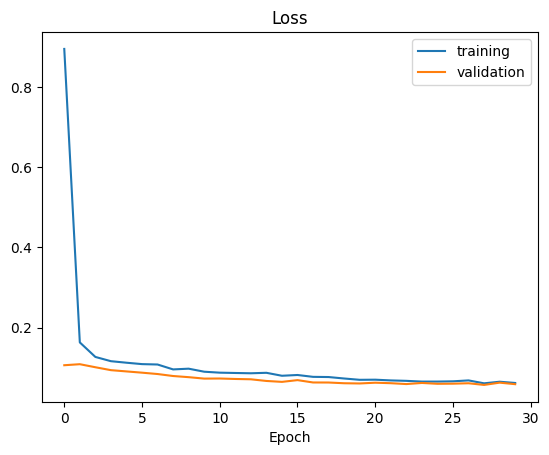

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [21]:
model.save('model.h5')